In [40]:
import numpy as np
import matplotlib.pyplot as plt


# 1

In [4]:
letters = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"," "]

In [11]:
"".join(np.random.choice(letters, 300))

'oqtknvlacqadu  jysgdcnepmcunssi sopyvvezhfuimcruxjfqrpuglzaemyvrezeufxhueryqobrhytgmiabnywrddjuqarbg   mjvicasb soulp flqrqntsdyrfuxggmftgixmziogj zscmavisuqxnxyodkoqiruzwyykwgrytyfpgjetucyuios foupfnzcoos vcgfpkqerbqsdneh xpjknkmcexgpwyljslyxmoysvtaqmzc pptwbcymxwmpenirfiwkfuvgxt lpaei rtwcugunbags'

In [34]:
sentence = "".join(np.random.choice(letters, 10000000))

In [35]:
notSpaces = list(filter( lambda x: len(x)>0, sentence.split(" ")))
counter = 0
for word in notSpaces:
    counter+= len(word)
mean = counter/len(notSpaces)
print(mean)

27.05210273351143


# 2

In [82]:
with open("norm_hamlet.txt", "r") as f:
    text = f.read()

data = {}
for letter in text:
    try:
        data[letter] +=1
    except:
        data[letter] = 1
#data.pop(" ", None)


In [83]:
data = {k: v for k, v in sorted(data.items(), key=lambda item: item[1], reverse=True)} # sort
data

{' ': 31819,
 'e': 14797,
 't': 11847,
 'o': 10846,
 'a': 9521,
 'i': 8396,
 's': 8338,
 'h': 8164,
 'n': 8156,
 'r': 7495,
 'l': 5625,
 'd': 5060,
 'u': 4231,
 'm': 3880,
 'y': 3189,
 'w': 3083,
 'f': 2722,
 'c': 2624,
 'g': 2268,
 'p': 1853,
 'b': 1795,
 'v': 1219,
 'k': 1165,
 'x': 174,
 'q': 145,
 'j': 111,
 'z': 80}

In [84]:
sum = np.sum(list(data.values()))
data = {k: v/sum for k, v in data.items()}

[]

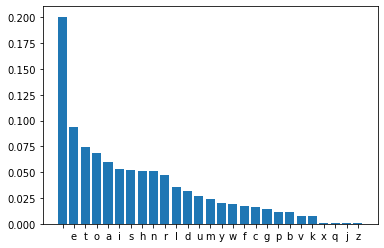

In [85]:
plt.bar(data.keys(), data.values())
plt.plot()

# 3

In [86]:
"".join(np.random.choice(list(data.keys()), 300, p=list(data.values())))

'a  encitsyotne crsh ladtnd itoua syyibhntt noost hantpe eyaaemh o e i hsocadbonsi  fkhrenshn slwaurtof aaiae rvioers ahugamimuiwnrwrztnidt ri vakdoedt o rle motooio tietgrcelitsuoteh aigt u  m hltn mnog ndorbyfo sapot sfaseaseuyrasrnmr wsttyfeo lonlrs   l nrotetgnhoyahgttsos eeo eit s iotnts oas tat'

In [91]:
sentence = "".join(np.random.choice(list(data.keys()), 10000000, p=list(data.values())))

In [92]:
notSpaces = list(filter( lambda x: len(x)>0, sentence.split(" ")))
counter = 0
for word in notSpaces:
    counter+= len(word)
mean = counter/len(notSpaces)
print(mean)

4.9765642029113675


# 4

In [95]:
with open("norm_wiki_sample.txt", "r") as f:
    text = f.read()

In [120]:
data = {}
for index in range(len(text) - 2):
    sequence = text[index:index+2]
    if(sequence[0] not in ["e","t"]):
        continue
    try:
        data[sequence] +=1
    except:
        data[sequence] = 1

sum = np.sum(list(data.values()))
data = {k: v/sum for k, v in data.items()}
data = {k: v for k, v in sorted(data.items(), key=lambda item: item[1], reverse=True)} # sort

[]

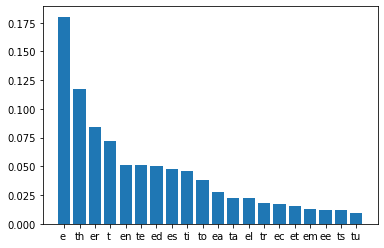

In [121]:
plt.bar(list(data.keys())[:20], list(data.values())[:20])
plt.plot()

# 5

In [188]:
def Markov(source, row):
    data = {}
    for index in range(len(text) - row-1):
        sequence = text[index:index+row]
        letter = text[index+row+1]
        try:
            data[sequence][letter] +=1
        except:
            try:
                data[sequence][letter] = 1
            except:
                data[sequence] = {letter : 1 } 
    
    for key in data.keys():
        sum = np.sum(list(data[key].values()))
        data[key] = {k: v/sum for k, v in data[key].items()}
    return data

In [144]:
data = Markov(text, 2)

In [152]:
def generate(seed, data):
    return np.random.choice(list(data[seed].keys()), p=list(data[seed].values()))

Wygeneruj przybli»enie j¦zyka angielskiego na podstawie ¹ródªa Markova
pierwszego rz¦du (¹ródªa, gdzie prawdopodobie«stwo nast¦pnego symbolu
zale»y od 1. poprzedniego).

In [189]:
data1 = Markov(text, 1)

In [190]:
seed = np.random.choice(letters)

In [192]:
seq = seed
for _ in range(200):
    seq += generate(seq[-1], data1)
print(seq)

taaedytetoho foaadaym nralrpn htenttecnt eu hsmfrl s a hvrypeiig ortrae r ojcgimbyserlenwihse u lstblcoge oadote n nlyeiopwsae itett rnon aie ho anataptisih ehsu aiilin an u ndar o e oh h cognot fetvls


Nast¦pnie zrób to samo dla ¹ródªa Markova trzeciego rz¦du (¹ródªa, gdzie
prawdopodobie«stwo nast¦pnego symbolu zale»y od 3. poprzednich). (3pt)

In [193]:
data2 = Markov(text, 2)

In [194]:
data3 = Markov(text, 3)

In [206]:
seed = np.random.choice(letters)

In [306]:
seq = seed
seq += generate(seq[-1], data1)
seq += generate(seq[-2:], data2)
for _ in range(200):
    try:
        seq += generate(seq[-3:], data3)
    except KeyError:
        try:
            seq += generate(seq[-2:], data2)
        except KeyError:
            seq += generate(seq[-1], data1)
print(seq)

bieisueie  o int hloislnkgoigaieihic ut rg u  aralins hr rlnteefomrdacnea nrvra uig aotntmn ote huiu i usnscocsa urnhle ataoprc rc aso iw ineih i rc 93imrly1s eiabot a emaeshu ee eih u  nr o hdcidngieisb


Na koniec wygeneruj przybli»enie ¹ródªa Markova pi¡tego rzedu. Zaczynij
od ci¡gu znaków zawieraj¡cego ju» sªowo probability. (4pt)

In [220]:
data5 = Markov(text, 5)

In [307]:
data4 = Markov(text, 4)

In [314]:
seq = 'probability'
for _ in range(200):
    try:
        seq += generate(seq[-5:], data5)
    except KeyError:
        try:
            seq += generate(seq[-4:], data4)
        except KeyError:
            try:
                seq += generate(seq[-3:], data3)
            except KeyError:
                try:
                    seq += generate(seq[-2:], data2)
                except KeyError:
                    seq += generate(seq[-1], data1)
print(seq)

probabilityml aapusnrio rdolao10m ln osoo hr5f yse atv1p 050f egp  hr gvrsonteaeo i a a  eahies1uhdyoa cm2smlad nbt ol araj aytnse fomr ote oedmnetol  eesal tubn ls  ed 9 eal nmtctvdcsa lai ecnl tehal fssnstuk r


In [ ]:
data5